Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product

IMPORTING LIBRARIES

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


PERFORMING EDA

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


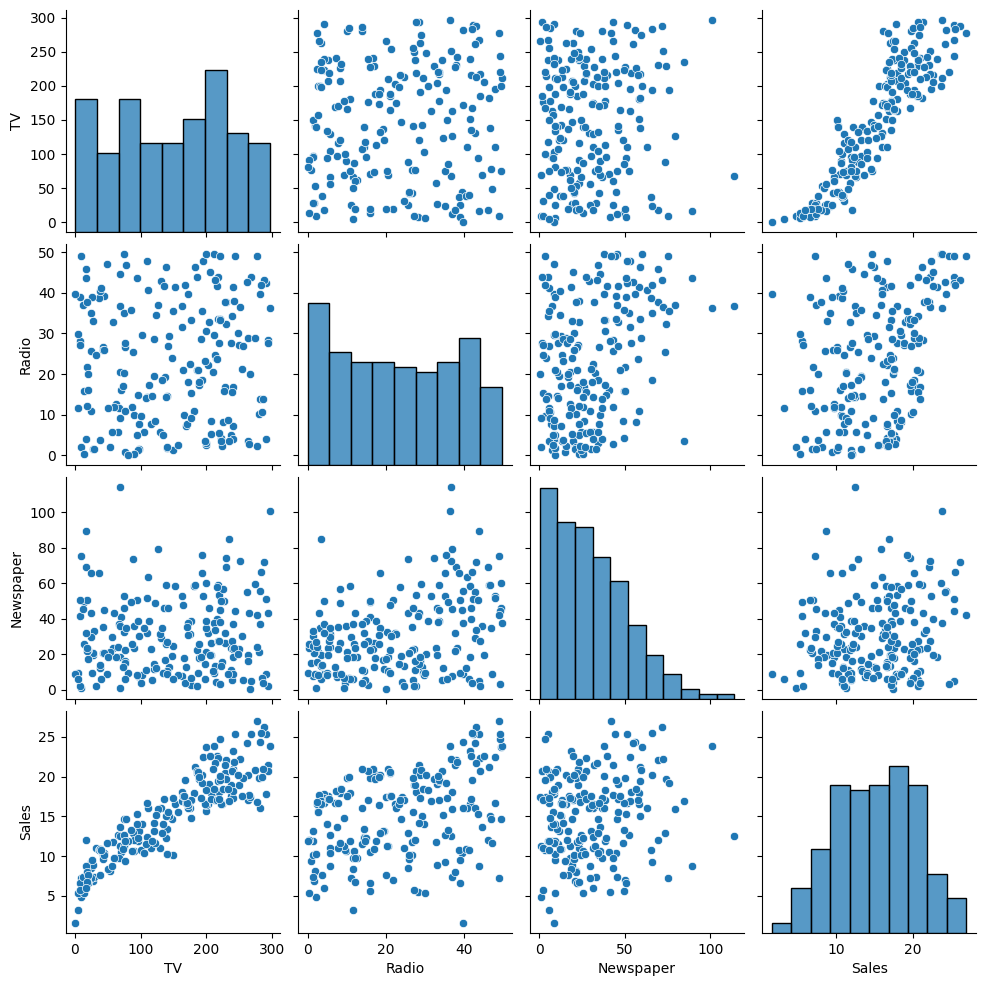

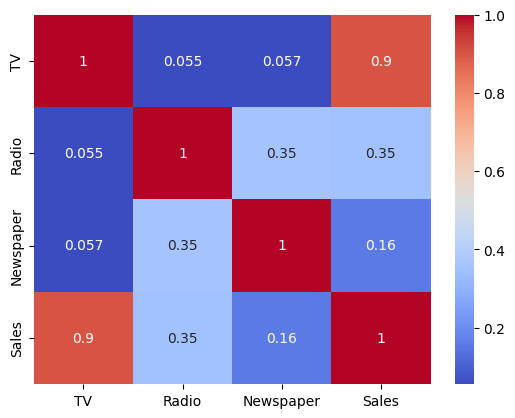

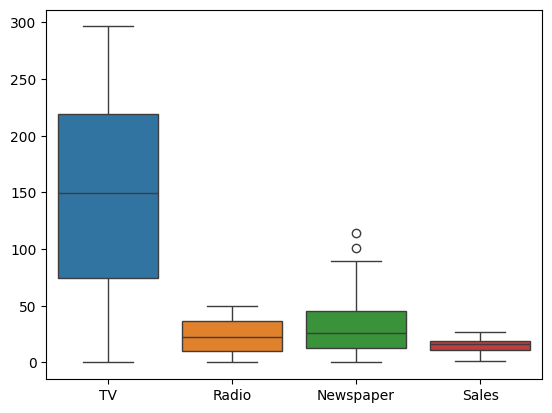

In [6]:
# Summary statistics
print(df.describe())
print('===============================')

sns.pairplot(df)
plt.show()
print('===============================')

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
print('===============================')

sns.boxplot(data=df)
plt.show()
print('===============================')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('===============================')


what is ols(ordinary least square)

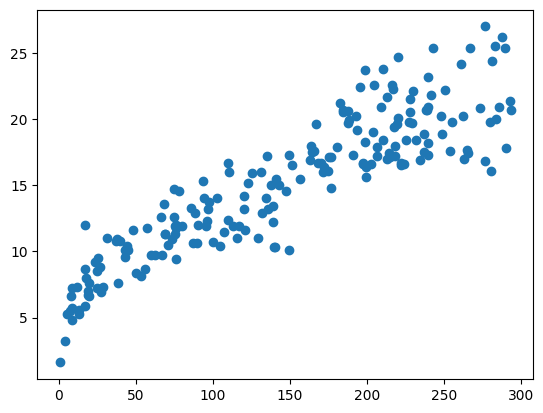

In [7]:
plt.scatter(df_cleaned['TV'], df_cleaned['Sales'], label='Data Points')

#REGRESSION
from sklearn.linear_model import LinearRegression
import seaborn as sns
y = df['TV']

X = df['Sales']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_


linear_equation = f"y = {slope:.4f} * x + {intercept:.4f}"
linear_equation = slope * X + intercept


plt.figure(figsize=(12, 6))
plt.plot(X, y, color='blue',linewidth=2, label='OLS LINE')
sns.lineplot(linear_equation,color='green')
plt.title('Linear Regression on TV vs SALES')
plt.xlabel('SALES')
plt.ylabel('TV')
plt.legend()
plt.grid()

plt.show()

print("Linear Equation:", linear_equation)


PLOTTING REGRESSION LINE ON EACH VARIABLE

In [8]:
df = df_cleaned

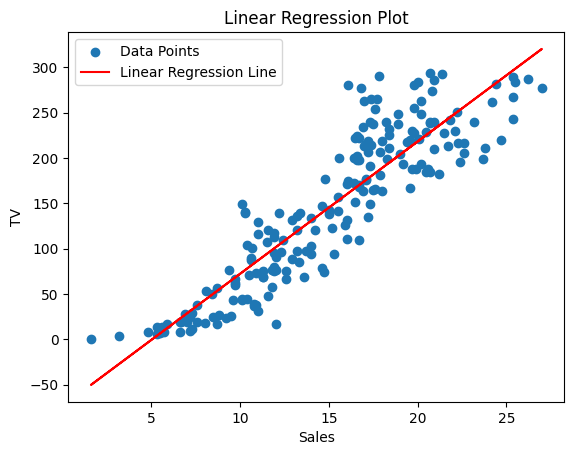

In [9]:
x = df['Sales']
y = df['TV']
m, c = np.polyfit(x, y, 1)  # Getting slope (m) and intercept (c)
y_pred = m * x + c
plt.scatter(df['Sales'], df['TV'], label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.legend()
plt.title('Linear Regression Plot')
plt.show()


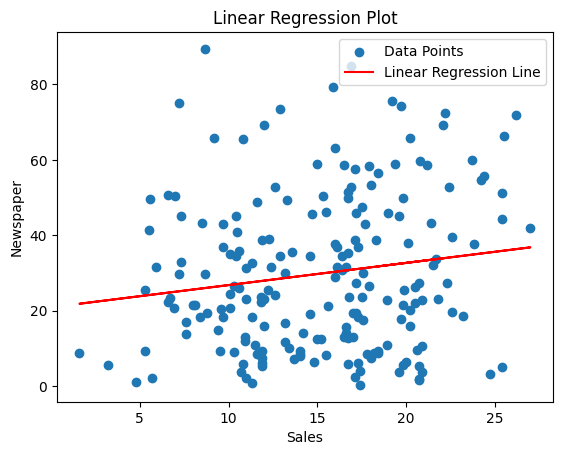

In [10]:
x = df['Sales']
y = df['Newspaper']
m, c = np.polyfit(x, y, 1)  # Getting slope (m) and intercept (c)
y_pred = m * x + c
plt.scatter(df['Sales'], df['Newspaper'], label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.legend()
plt.title('Linear Regression Plot')
plt.show()


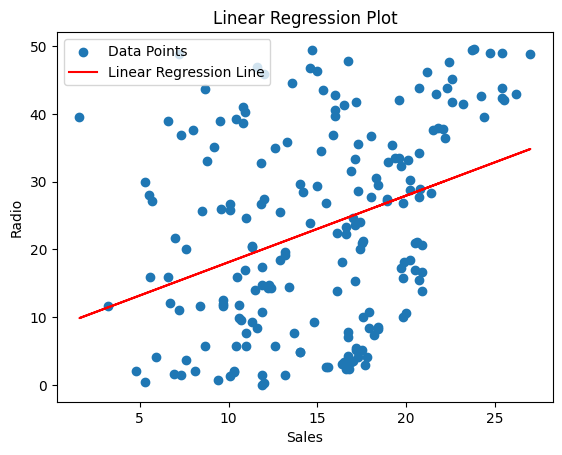

In [11]:
x = df['Sales']
y = df['Radio']
m, c = np.polyfit(x, y, 1)  # Getting slope (m) and intercept (c)
y_pred = m * x + c

# Scatter plot
plt.scatter(df['Sales'], df['Radio'], label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.legend()
plt.title('Linear Regression Plot')
plt.show()


CORRELATION

In [12]:
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.899974
Radio        0.348566
Newspaper    0.151764
Name: Sales, dtype: float64


Here we can conclude that TV has more correlation with sales where as newspaper has least correlation with sales

In [13]:
X =  df.drop('Sales', axis = 1)
y = df['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=42)

In [15]:
# Initialize models
linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# Fit models
models = [linear_model, decision_tree, random_forest]
model_names = ["Linear Regression", "Decision Tree", "Random Forest"]

for model, name in zip(models, model_names):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(f"{name} - R2 Score: {r2_score(ytest, y_pred):.4f}, RMSE: {mean_squared_error(ytest, y_pred, squared=False):.4f}")


Linear Regression - R2 Score: 0.9130, RMSE: 1.5543
Decision Tree - R2 Score: 0.9149, RMSE: 1.5376
Random Forest - R2 Score: 0.9637, RMSE: 1.0044


In [18]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)
print(f"R2 Score after tuning: {r2_score(ytest, y_pred):.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score after tuning: 0.9630


In [22]:
# Save the best model to a file
with open('best_sales_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

BASIC MODEL AND ITS PREDICTION EXAMPLE OF LINEAR REGRESSION

In [19]:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9130003152798273


Input values into the model according to the features we have used to train it and predict how many units of the product can be sold based on the amount spent on its advertising on various platforms

In [20]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37497016]
